In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Load MNIST dataset from TensorFlow
(x_train_val, y_train_val), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten images (28x28 → 784 pixels) and normalize to range [0,1]
x_train_val = x_train_val.reshape(x_train_val.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Split into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, random_state=42)

# Convert to Pandas DataFrame (Optional)
x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
x_test = pd.DataFrame(x_test)

# Labels (Optional conversion to Pandas Series)
y_train = pd.Series(y_train)
y_val = pd.Series(y_val)
y_test = pd.Series(y_test)

Train set: (48000, 784), (48000,)
Validation set: (12000, 784), (12000,)
Test set: (10000, 784), (10000,)
Random Forest Accuracy on Validation Set: 0.9615
XGBoost Accuracy on Test Set: 0.9661


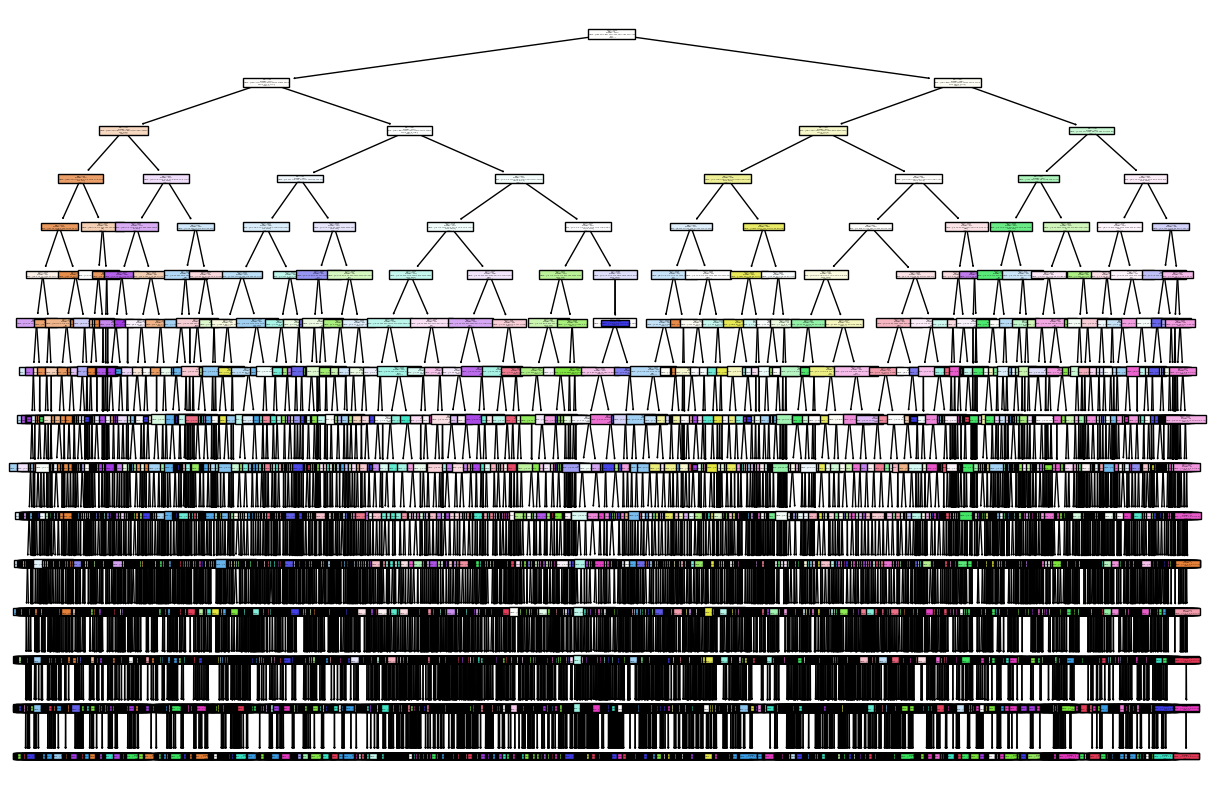

In [17]:
# Check dataset shapes
print(f"Train set: {x_train.shape}, {y_train.shape}")
print(f"Validation set: {x_val.shape}, {y_val.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=15, max_features=15, random_state=42)
rf_model.fit(x_train, y_train)
print(f"Random Forest Accuracy on Validation Set: {rf_model.score(x_val, y_val):.4f}")

# Train XGBoost Classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, learning_rate=0.1, max_depth=15, n_estimators=50)
xgb_model.fit(x_train, y_train)

# Predict and evaluate XGBoost model
xgb_preds = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy on Test Set: {xgb_accuracy:.4f}")

# Visualizing a Random Forest Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[3], filled=True, feature_names=[str(i) for i in range(784)], class_names=[str(i) for i in range(10)])
plt.show()